# Render the VBGS

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import rich

from pathlib import Path
from PIL import Image
from matplotlib import pyplot as plt

import vbgs
from vbgs.data.blender import BlenderDataIterator
from vbgs.render.volume import (
    readCamerasFromTransforms,
    render_img,
    vbgs_model_to_splat,
)

from vbgs.data.habitat import HabitatDataIterator

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [3]:
root_path = Path(vbgs.__file__).parent.parent
blender_data_path = root_path / "../../data/blender/lego"

# load the data in our format
data_iter = BlenderDataIterator(blender_data_path, "transforms_val.json")
rich.print(data_iter._frames[0])

# Load the cameras in the gaussian-splatting format
cameras = readCamerasFromTransforms(
    blender_data_path, "transforms_val.json", True
)

# Load the trained model
splat_path = (
    "data/blender-dataset/lego/nc:10000/subs:None_randinit:True/model_199.json"
)
model = vbgs_model_to_splat(root_path / splat_path)

{
    'file_path': './val/r_0',
    'rotation': 0.012566370614359171,
    'transform_matrix': [
        [-0.963964581489563, -0.2611401677131653, 0.0507759265601635, 0.2046843022108078],
        [0.26603081822395325, -0.9462433457374573, 0.18398693203926086, 0.7416750192642212],
        [7.450580596923828e-09, 0.1908649355173111, 0.9816163182258606, 3.957021951675415],
        [0.0, 0.0, 0.0, 1.0]
    ]
}

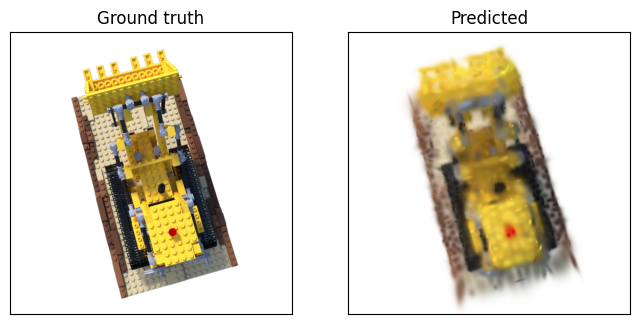

In [4]:
i = 0
x_hat = render_img(model, cameras, i, 1)
x = Image.open(
    str(blender_data_path / data_iter._frames[i]["file_path"]) + ".png"
)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(x)
ax[0].set_title("Ground truth")

ax[1].imshow(x_hat)
ax[1].set_title("Predicted")

[a.set_xticks([]) for a in ax.flatten()]
[a.set_yticks([]) for a in ax.flatten()]
plt.show()

In [5]:
root_path = Path(vbgs.__file__).parent.parent

habitat_data_path = (
    "/home/shared/habitat_processed/habitat-test-scenes/van-gogh-room/"
)

# load the data in our format
data_iter = HabitatDataIterator(habitat_data_path, "", None)
rich.print(data_iter._frames[0])

# Load the cameras in the gaussian-splatting format
cameras = readCamerasFromTransforms(
    root_path / "resources/large-datasets/van-gogh-room",
    "transforms_eval_200.json",
    True,
)

# Load the trained model
splat_path = "data/rooms/van-gogh-room_shuffle:True/nc:100000/randinit:True_reassign:True/model_199.json"
model = vbgs_model_to_splat(root_path / splat_path)

/home/shared/habitat_processed/habitat-test-scenes/van-gogh-room/0_1.jpeg

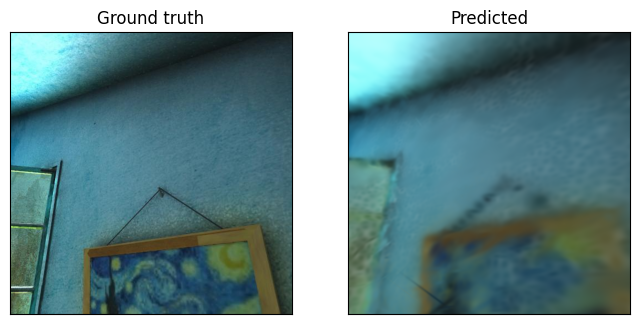

In [6]:
i = 0
x_hat = render_img(model, cameras, i, 1, scale=2)
x = Image.open(data_iter._frames[i])

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(x)
ax[0].set_title("Ground truth")

ax[1].imshow(x_hat)
ax[1].set_title("Predicted")

[a.set_xticks([]) for a in ax.flatten()]
[a.set_yticks([]) for a in ax.flatten()]
plt.show()